# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [11]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
app_train["equal_width_DAYS_BIRTH"] = pd.cut(app_train["DAYS_BIRTH"]/360, 4)
age_groups = app_train.groupby('equal_width_DAYS_BIRTH')
age_groups.describe()

SK_ID_CURR                                          \
                            count           mean            std       min   
equal_width_DAYS_BIRTH                                                      
(20.754, 33.122]          66536.0  277514.538400  102714.818328  100002.0   
(33.122, 45.442]         100780.0  278569.479073  102893.775338  100009.0   
(45.442, 57.761]          84690.0  278342.534998  102935.881603  100003.0   
(57.761, 70.081]          55505.0  278025.416287  102467.833239  100027.0   

                                                                    TARGET  \
                              25%       50%        75%       max     count   
equal_width_DAYS_BIRTH                                                       
(20.754, 33.122]        188580.75  276779.5  366166.25  456251.0   66536.0   
(33.122, 45.442]        189677.75  278548.5  367963.00  456254.0  100780.0   
(45.442, 57.761]        189048.75  278653.0  367612.75  456255.0   84690.0   
(57.761, 70.081]        188932.00  278520.0  366293.00  456249.0   55505.0   

                                  ... AMT_REQ_CREDIT_BUREAU_QRT         \
                            mean  ...                       75%    max   
equal_width_DAYS_BIRTH            ...                                    
(20.754, 33.122]        0.111534  ...                       0.0    8.0   
(33.122, 45.442]        0.087051  ...                       0.0  261.0   
(45.442, 57.761]        0.068485  ...                       0.0   19.0   
(57.761, 70.081]        0.051004  ...                       0.0    7.0   

                       AMT_REQ_CREDIT_BUREAU_YEAR                           \
                                            count      mean       std  min   
equal_width_DAYS_BIRTH                                                       
(20.754, 33.122]                          54632.0  1.744381  1.772438  0.0   
(33.122, 45.442]                          89212.0  1.843530  1.810925  0.0   
(45.442, 57.761]                          73735.0  1.923849  1.865480  0.0   
(57.761, 70.081]                          48413.0  2.143205  2.053497  0.0   

                                             
                        25%  50%  75%   max  
equal_width_DAYS_BIRTH                       
(20.754, 33.122]        0.0  1.0  3.0  22.0  
(33.122, 45.442]        0.0  1.0  3.0  23.0  
(45.442, 57.761]        0.0  2.0  3.0  19.0  
(57.761, 70.081]        0.0  2.0  3.0  25.0  

[4 rows x 872 columns]

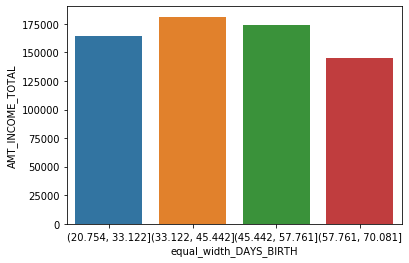

In [13]:
x = age_groups.mean().index
y = age_groups.mean()['AMT_INCOME_TOTAL']
sns.barplot(x,y)
plt.show()